# EDA 

* Data from [WiDS Datathon 2021](https://www.kaggle.com/c/widsdatathon2021)

* Objective: To determine whether a patient admitted to an Intensive Care Unit (ICU) has been diagonsed with a particular type of diabetes, Diabetes Mellitus, using data from the first 24 hours of intensive care.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd # grid for plot alignment
import seaborn as sns
sns.set_palette('Set3')
sns.set_context(rc={'axes.labelsize':18,
                    'axes.titlesize':18,
                    'font.size':15,
                    'legend.fontsize':15,
                    'lines.linewidth':2.2})

import warnings
warnings.filterwarnings("ignore")
from ipywidgets import interact   # interactive plot

In [2]:
# Import training data
train = pd.read_csv("../data/TrainingWiDS2021.csv", index_col=0)
test = pd.read_csv("../data/UnlabeledWiDS2021.csv", index_col=0)

print(train.shape)
print(test.shape)

train.head()

(130157, 180)
(10234, 179)


,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,...,337.0,337.0,0,0,0,0,0,0,0,0
5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0


### Which is the target (label) column to predict?

In [3]:
target = [col for col in train.columns if col not in test.columns]
target

['diabetes_mellitus']

<AxesSubplot:xlabel='diabetes_mellitus', ylabel='count'>

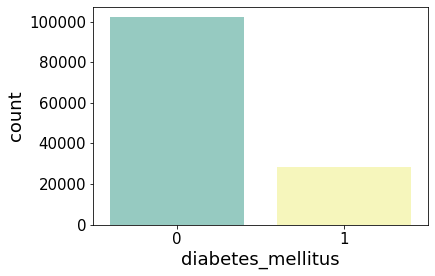

In [4]:
# Count targets
sns.countplot(train['diabetes_mellitus'])

* Unbalanced binary target distribution

## 1. Training data quality check

In [5]:
# Missing rows (just check, don't do anything yet)
prop_isnull = train.isnull().mean()
prop_isnull = prop_isnull[prop_isnull > 0]
prop_isnull

age                     0.038323
bmi                     0.034497
ethnicity               0.012193
gender                  0.000507
height                  0.015958
                          ...   
h1_arterial_ph_min      0.828607
h1_arterial_po2_max     0.825503
h1_arterial_po2_min     0.825503
h1_pao2fio2ratio_max    0.871232
h1_pao2fio2ratio_min    0.871232
Length: 160, dtype: float64

* 160 out of 180 columns have missing information, number of missing records ranging between 3.8 - 87.1%

In [6]:
# Duplicated rows
train[train.duplicated() == True]

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus


* No duplicated rows

## 2. Data distribution

In [7]:
# Data types
train.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [8]:
# Separate data by continous, categorical, boolean types
categoricals = train.select_dtypes(include=["object"])
bools = train.select_dtypes(include=["bool"])
continuous = train.select_dtypes(exclude=["object", "bool"])

print(categoricals.shape)
print(bools.shape)
print(continuous.shape)

(130157, 6)
(130157, 0)
(130157, 174)


## 2-1. Categorical variables

In [22]:
# Missing data per each column
categoricals.isnull().mean()

ethnicity                0.012193
gender                   0.000507
hospital_admit_source    0.255061
icu_admit_source         0.001844
icu_stay_type            0.000000
icu_type                 0.000000
dtype: float64

* 25% of the observations lack their hospital_admit_source

In [119]:
# Interactive plot to check distribution of categorical variables
@interact(cols=categoricals.columns)
def get_countplot(cols):
    plt.figure(figsize=(12,6))
    plt.title(f'Distribution of {cols}')
    sns.countplot(train[cols])
    
    # Rotate the xlabels if more than 4 values available
    if categoricals[cols].nunique() > 4:
         plt.xticks(rotation=40)
            
    # Print normalized counts of each variable
    print(categoricals[cols].value_counts(normalize=True).round(2))

interactive(children=(Dropdown(description='cols', options=('ethnicity', 'gender', 'hospital_admit_source', 'i…

### Highlights of categorical data

**Ethnity**
* Highly unbalanced ratial distribution: Majority of the data (~78%) is from Caucasians.

**Gender**
* Slightly more male samples(54%) than the females (46%)

**Hospital admit source**
* More than 52% from Emergercy Department. (Remember, 25% of the patients lack this information)

**ICU admit source**
* Over 59% of patients admitted to ICU after Accident & Emergency

**ICU stay type**
* Most(95%) of the patients stay admitted to the unit, ~4% transferred to other locations, <1% readmitted

**ICU type**
* ~55% of the patients in Med-Surg ICU (=Medical Surgical Intensive Care Unit)

In [117]:
# Interactive plot to check relationships
# between the categorical variables and the target variable
@interact(cols=categoricals.columns)
def get_countplot_diabetes(cols):
    plt.figure(figsize=(12,6))
    sns.countplot(x='diabetes_mellitus', hue=cols, data=train)
    plt.title(cols)
    plt.legend(bbox_to_anchor=(1.3, 1))
    
    # Print normalized counts of each variable
    print(train.groupby(cols)['diabetes_mellitus'].value_counts(normalize=True).round(2))

interactive(children=(Dropdown(description='cols', options=('ethnicity', 'gender', 'hospital_admit_source', 'i…

**Ethnity**
* Regardless of ethnity, 20-30 % of the patients from the data had diabetes mellitus

**Gender**
* In both sexes, 21-22 % of the patiens had diabetes mellitus

**Hospital admit source, ICU admit source, ICU stay type, ICU type**
* Similar to ethnity, roughly 20-30 % of each group had diabetes mellitus

## 2-2. Continuous variables

In [118]:
# Interactive plot to check distribution of continuous variables

# Excude ids from plot
except_ids = [col for col in continuous.columns if col[-2:] != 'id']

# Histograms to show distribution of continuous values
@interact(cols=except_ids)
def get_histplot(cols):
    plt.figure(figsize=(12,6))
    plt.title(f'Distribution of {cols}')
    sns.histplot(continuous[cols])
    
    plt.axvline(continuous[cols].median(), color='red')  # Median in red
    plt.axvline(continuous[cols].mean(), color='green')  # Mean in green
    
    print('Mean: ', round(continuous[cols].mean(), 1))
    print('Median: ', round(continuous[cols].median(), 1))

interactive(children=(Dropdown(description='cols', options=('age', 'bmi', 'elective_surgery', 'height', 'pre_i…

### Selected highlights of continous data

**

In [116]:
# Interactive relplot between continuous variables and the target variable
@interact(cols=except_ids + ['diabetes_mellitus'])
def get_violinplot(cols):
    plt.figure(figsize=(12,6))
    sns.violinplot(x=train['diabetes_mellitus'], y=train[cols])
    
    # Print normalized counts of each variable
    count_diabetes = train.groupby('diabetes_mellitus')[cols].count()
    print('Total obervations: ', count_diabetes.sum())
    print(' ')
    print(count_diabetes)

interactive(children=(Dropdown(description='cols', options=('age', 'bmi', 'elective_surgery', 'height', 'pre_i…

In [11]:
# 3. Data cleaning + Feature engineering

In [13]:
# 4. Modeling - A. Baseline

In [14]:
# 4. Modeling - B. Beat the baseline